In [1]:
#imports
import os 
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset , Dataset , DatasetDict
import pandas as pd

In [2]:
#environment
load_dotenv(override=True)

#hugging face login
hf_token = os.getenv("HF_TOKEN")
login(hf_token , add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
#loading the small dataset for structure checking and curation

dataset=load_dataset("McAuley-Lab/Amazon-Reviews-2023","raw_meta_Appliances",split='full',trust_remote_code=True)

print(f"Number of datapoints:{len(dataset):,}")

Number of datapoints:94,327


In [4]:
#TODO:Looking at the dataset to see what has to be done
df = pd.DataFrame([dataset[10]])
df

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Tools & Home Improvement,WP67003405 67003405 Door Pivot Block - Compati...,4.1,4,[WP67003405 Pivot Block For Vernicle Mullion S...,[],16.52,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['High-Quality Items for a Fast DIY ...,PartsBroz,"[Appliances, Parts & Accessories]","{""Manufacturer"": ""PartsBroz"", ""Part Number"": ""...",B09QT3TJBZ,None,None,None


In [5]:
keys = df.columns.tolist()
print(keys)


['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author']


In [6]:
print(dataset[99]["title"]) #does the naming of the product
print(dataset[99]["features"])  #will give as the name says features
print(dataset[99]["description"]) #this is the meat of the dataset
print(dataset[99]["price"]) #final result 
print(dataset[99]["details"]) #most importantly gives manufacturer and brand , other things are good to have but not necessary

Samsung DG94-00935A Range Surface Burner Valve Genuine Original Equipment Manufacturer (OEM) Part Pink
['Samsung ASSY VALVE AUX;FX710BGS, (DG94-00935A)']
['Samsung Range/Stove/Oven Surface Burner Valve.', 'Genuine OEM Part # DG94-00935A.']
72.23
{"Manufacturer": "Samsung", "Part Number": "DG94-00935A", "Item Weight": "1.09 ounces", "Product Dimensions": "6 x 4 x 4 inches", "Item model number": "DG94-00935A", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Required?": "No", "Best Sellers Rank": {"Tools & Home Improvement": 415029, "Parts & Accessories": 59307}, "Date First Available": "June 5, 2015"}


In [7]:
#checking which of them has a price 
#using try except block avoids the None value error 
prices = 0 
for data in dataset:
    try:
        price = float(data["price"])
        if price > 0 :
            prices += 1 
    except ValueError as e:
        pass

print(f"There are {prices:,} with a valid price , which is {prices/len(dataset)*100:,.1f}")

There are 46,726 with a valid price , which is 49.5


In [8]:
#content we want to include from the dataset into our prompt
# title , description , features , details and atlast price
#to analyse the token we need the length of the prompt 

prices =[] 
lengths =[]
for data in dataset:
    try :
        price = float(data["price"])
        if price > 0 :
            #adding to price list
            prices.append(price)
            #converting to string to concatinate 
            content = data["title"] + str(data["description"]) + str(data["features"]) + data["details"] 
            lengths.append(len(content))
    except ValueError as e:
        pass

## Visualizing using Matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

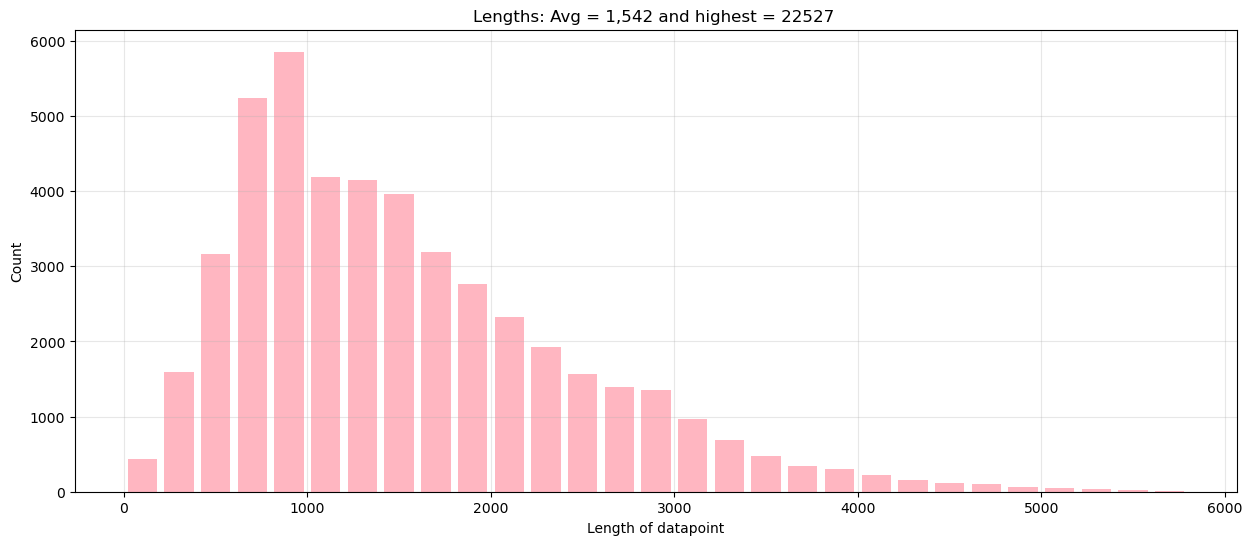

In [10]:
#data plot of lengths
plt.figure(figsize=(15,6))
plt.hist(lengths,rwidth = 0.8 ,color= 'lightpink' ,bins=range(0,6000,200))
plt.title(f"Lengths: Avg = {sum(lengths)/len(lengths):,.0f} and highest = {max(lengths)} ")
plt.xlabel("Length of datapoint")
plt.ylabel('Count')
plt.grid(True,alpha=0.3)
plt.show

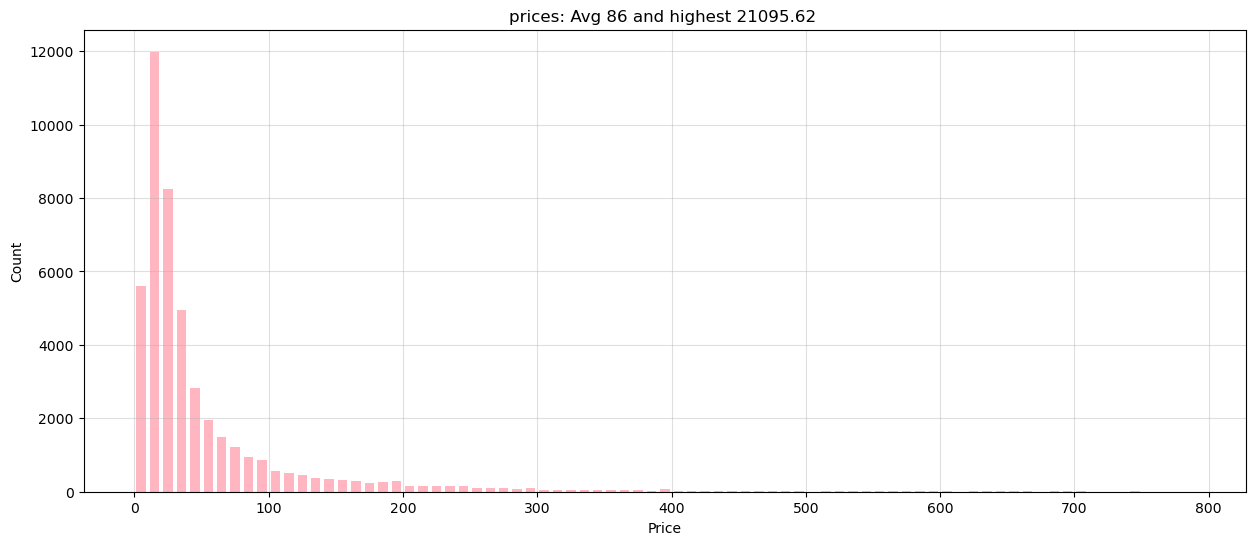

In [11]:
#data plot of prices->Pink because I love Pink
plt.figure(figsize=(15,6))
plt.hist(prices,rwidth = 0.7 ,color= 'lightpink' ,bins=range(0,800,10))
plt.title(f"prices: Avg {sum(prices)/len(prices):,.0f} and highest {max(prices)} ")
plt.xlabel("Price")
plt.ylabel("Count") 
plt.grid(True , alpha = 0.4)

In [12]:
#Highest product (for Curosity)
for data in dataset :
    try :
        price = float(data["price"]) 
        if price > 21094 :
            print(data['title']) 
            exit
    except ValueError as e:
        pass 

TurboChef BULLET Rapid Cook Electric Microwave Convection Oven


In [13]:

content = content = data["title"] + str(data["description"]) + str(data["features"]) + data["details"] 
print(content)
            

Edgewater Parts AP2039084-4 Rack Rollers Compatible With GE Dishwasher 4 Pack['AP2039084-4 Rack Rollers Compatible With GE Dishwasher Non-OEM replacement Replaces WD12X271, 2493, AH259136, DW113, DW604, EA259136, PS259136, WD12X0271, WD12X0426, WD12X0440, WD12X426, WD12X440 Color White']['AP2039084-4 Rack Rollers Compatible With GE Dishwashers', '1 YEAR WARRANTY', 'Replaces WD12X271, 2493, AH259136, DW113, DW604, EA259136, PS259136, WD12X0271, WD12X0426, WD12X0440, WD12X426, WD12X440', 'Color White']{"Manufacturer": "Edgewater Parts", "Part Number": "AP2039084-4", "Item Weight": "6 ounces", "Package Dimensions": "6 x 6 x 1 inches", "Is Discontinued By Manufacturer": "No", "Batteries Included?": "No", "Batteries Required?": "No", "Best Sellers Rank": {"Tools & Home Improvement": 1652026, "Parts & Accessories": 242654}, "Date First Available": "June 1, 2016"}


In [ ]:
# Fix Python path to import src module
import sys
import os

# Add the parent directory (Pricer) to Python path
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
sys.path.insert(0, os.path.join(parent_dir, 'src'))

print(f"Added to Python path: {parent_dir}")
print(f"Added to Python path: {os.path.join(parent_dir, 'src')}")

In [15]:
import src
from src.items import Item 


items = [] 
for data in dataset :
    try :
        price = float(data['price'])
        if price > 0 :
            item = Item(data,price) 
            if item.include: #sceptical about checking with this as 
                items.append(item) 
    except ValueError as e:
        pass

print ( f"There are {len(items):,} items")

There are 27,558 items


In [16]:
items[1]

<WP67003405 67003405 Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces AP6010352 8208254 PS11743531 - Quick DIY Repair Solution = $16.52>

In [17]:
print(items[1].prompt)

How much does this cost to the nearest dollar?

Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces - Quick DIY Repair Solution
Pivot Block For Vernicle Mullion Strip On Door - A high-quality exact equivalent for part numbers and Compatibility with major brands - Door Guide is compatible with Whirlpool, Amana, Dacor, Gaggenau, Hardwick, Jenn-Air, Kenmore, KitchenAid, and Maytag. Quick DIY repair - Refrigerator Door Guide Pivot Block Replacement will help if your appliance door doesn't open or close. Wear work gloves to protect your hands during the repair process. Attentive support - If you are uncertain about whether the block fits your refrigerator, we will help. We generally put forth a valiant effort to guarantee you are totally happy with your purchase. High-quality elements - Pivot Block Replacement meets or exceeds all manufacturer specifications. We

Price is $16.00


In [18]:
print(items[1].get_test_prompt())

How much does this cost to the nearest dollar?

Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces - Quick DIY Repair Solution
Pivot Block For Vernicle Mullion Strip On Door - A high-quality exact equivalent for part numbers and Compatibility with major brands - Door Guide is compatible with Whirlpool, Amana, Dacor, Gaggenau, Hardwick, Jenn-Air, Kenmore, KitchenAid, and Maytag. Quick DIY repair - Refrigerator Door Guide Pivot Block Replacement will help if your appliance door doesn't open or close. Wear work gloves to protect your hands during the repair process. Attentive support - If you are uncertain about whether the block fits your refrigerator, we will help. We generally put forth a valiant effort to guarantee you are totally happy with your purchase. High-quality elements - Pivot Block Replacement meets or exceeds all manufacturer specifications. We

Price is $


## Graphs for analysis of token count and prices

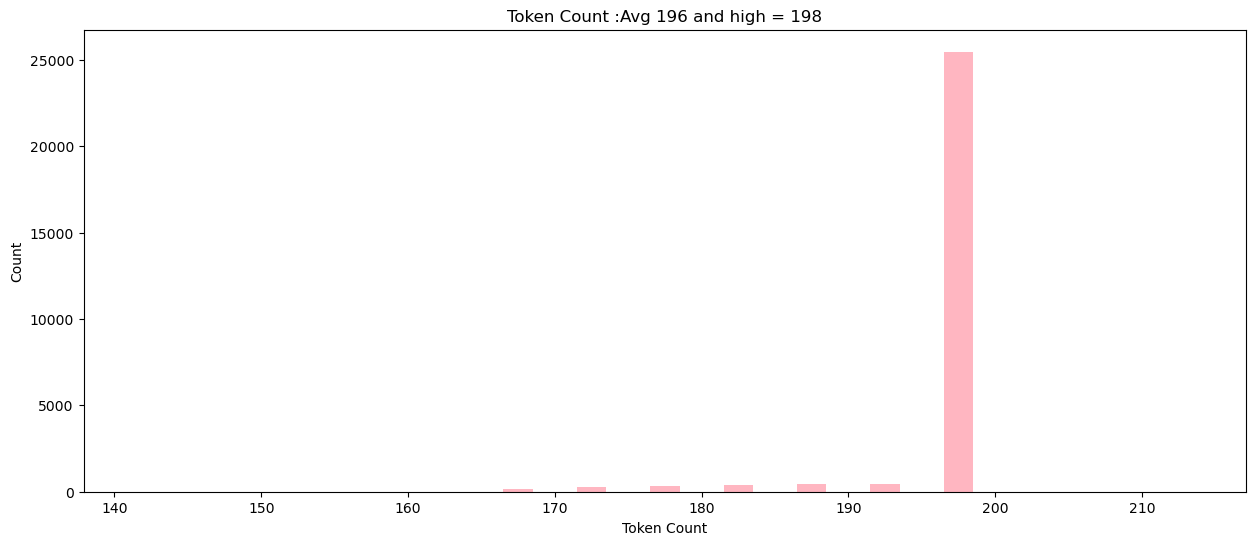

In [29]:
tokens = [item.token_count for item in items]
plt.figure(figsize=(15,6))
plt.title(f"Token Count :Avg {sum(tokens)/len(tokens):,.0f} and high = {max(tokens):,.0f}")
plt.xlabel("Token Count")
plt.ylabel("Count") 
plt.hist(tokens ,rwidth=0.4,color="lightpink",bins=range(140,220,5))
plt.show()

In [32]:
prices = [item.price for item in items]
print(f"{sum(prices)/len(prices):,.1f} and max = {max(prices)} and min = {min(prices)}")

98.5 and max = 10960.61 and min = 0.01


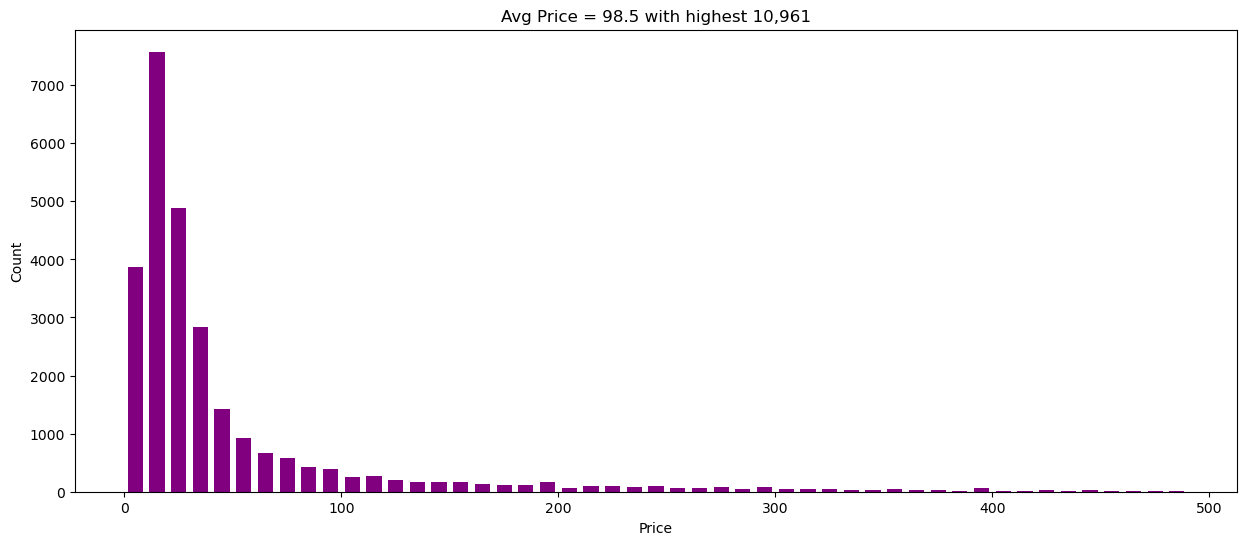

In [43]:
#prices of the selected products
prices = [item.price for item in items]
plt.figure(figsize=(15,6))
plt.title(f"Avg Price = {sum(prices)/len(prices):,.1f} with highest {max(prices):,.0f}")
plt.xlabel("Price")
plt.ylabel("Count")
plt.hist(prices , rwidth=0.7,color="purple",bins=range(0,500,10))
plt.show()

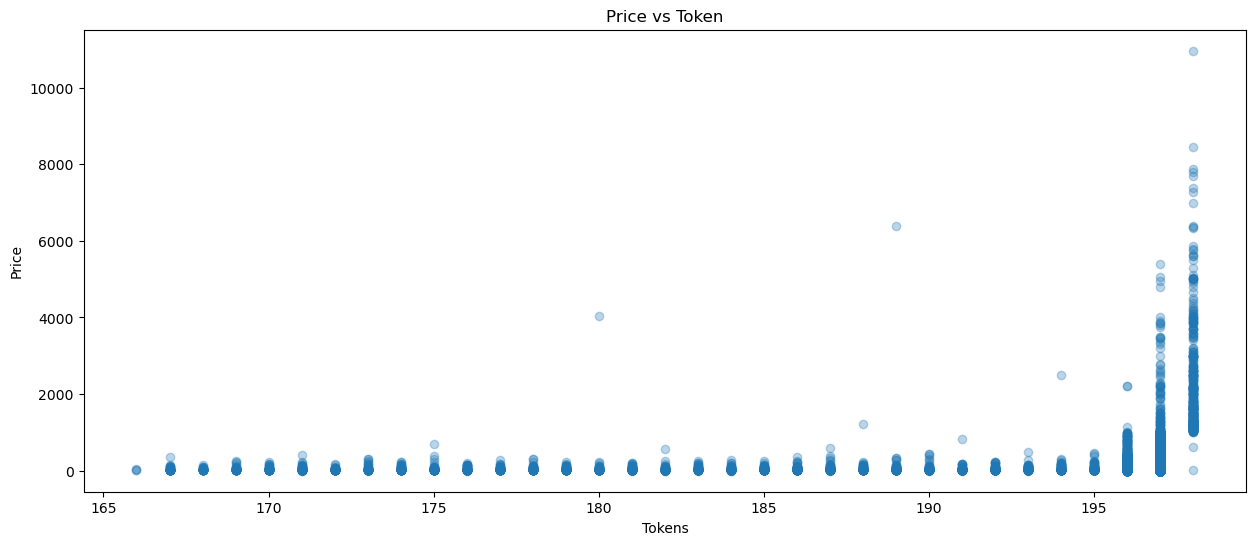

In [50]:
#scatter 
plt.figure(figsize=(15,6))
plt.xlabel("Tokens")
plt.ylabel("Price")
plt.title("Price vs Token")

plt.scatter(tokens,prices , alpha=0.3)

plt.show()